<a href="https://colab.research.google.com/github/HSE-LaMBDA/MLatURL2019/blob/master/day2/01-Introduction_to_useful_Python_libraries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Overview of useful Python libraries

# Numpy - multidimensional data arrays

The numpy package (module) is used in almost all numerical computation using Python. It is a package that provides high-performance vector, matrix and higher-dimensional data structures for Python. It is implemented in C and Fortran so when calculations are vectorized (formulated with vectors and matrices), performance is very good.

To use numpy you need to import the module, using for example:

In [1]:
import numpy as np # 'np' will be a simple alias for accessing numpy functions and classes

In the numpy package the main object used for vectors, matrices and higher-dimensional data sets is `ndarray` (the name stands for *n-dimensional array*).

## Creating numpy arrays


There are a number of ways to initialize new numpy arrays, for example from:
* a Python list or tuples
* using functions that are dedicated to generating numpy arrays, such as arange, linspace, etc.
* reading data from files

### From lists

For example, to create new vector and matrix arrays from Python lists we can use the numpy.array function.

In [2]:
# a vector: the argument to the array function is a Python list
v = np.array([1,2,3,4])

v

array([1, 2, 3, 4])

In [3]:
# a matrix: the argument to the array function is a nested Python list
M = np.array([[1, 2], [3, 4]])

M

array([[1, 2],
       [3, 4]])

The v and M objects are both of the type ndarray that the numpy module provides.

In [4]:
type(v), type(M)

(numpy.ndarray, numpy.ndarray)

The difference between the v and M arrays is only their shapes. We can get information about the shape of an array by using the ndarray.shape property.

In [5]:
v.shape

(4,)

In [6]:
M.shape

(2, 2)

The number of elements in the array is available through the ndarray.size property:

In [7]:
M.size

4

So far the numpy.ndarray looks awefully much like a Python list (or nested list). Why not simply use Python lists for computations instead of creating a new array type?

There are several reasons:

* Python lists are very general. They can contain any kind of object. They are dynamically typed. They do not support mathematical functions such as matrix and dot multiplications, etc. Implementing such functions for Python lists would not be very efficient because of the dynamic typing.
* Numpy arrays are statically typed and homogeneous. The type of the elements is determined when the array is created.
* Numpy arrays are memory efficient.
* Because of the static typing, fast implementation of mathematical functions such as multiplication and addition of numpy arrays can be implemented in a compiled language (C and Fortran is used).


Using the dtype (data type) property of an ndarray, we can see what type the data of an array has:

In [8]:
M.dtype

dtype('int64')

We get an error if we try to assign a value of the wrong type to an element in a numpy array:

In [9]:
M[0,0] = "hello"

ValueError: invalid literal for int() with base 10: 'hello'

If we want, we can explicitly define the type of the array data when we create it, using the dtype keyword argument:

In [10]:
M = np.array([[1, 2], [3, 4]], dtype=complex)

M

array([[ 1.+0.j,  2.+0.j],
       [ 3.+0.j,  4.+0.j]])

Common data types that can be used with dtype are: int, float, complex, bool, object, etc.

We can also explicitly define the bit size of the data types, for example: int64, int16, float128, complex128.

### Using array-generating functions

For larger arrays it is inpractical to initialize the data manually, using explicit python lists. Instead we can use one of the many functions in numpy that generate arrays of different forms. Some of the more common are:

**arange**

In [11]:
# create a range

x = np.arange(0, 10, 1) # arguments: start, stop, step

x

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [12]:
x = np.arange(-1, 1, 0.1)

x

array([ -1.00000000e+00,  -9.00000000e-01,  -8.00000000e-01,
        -7.00000000e-01,  -6.00000000e-01,  -5.00000000e-01,
        -4.00000000e-01,  -3.00000000e-01,  -2.00000000e-01,
        -1.00000000e-01,  -2.22044605e-16,   1.00000000e-01,
         2.00000000e-01,   3.00000000e-01,   4.00000000e-01,
         5.00000000e-01,   6.00000000e-01,   7.00000000e-01,
         8.00000000e-01,   9.00000000e-01])

**linspace** and **logspace**

In [13]:
# using linspace, both end points ARE included
np.linspace(0, 10, 25)

array([  0.        ,   0.41666667,   0.83333333,   1.25      ,
         1.66666667,   2.08333333,   2.5       ,   2.91666667,
         3.33333333,   3.75      ,   4.16666667,   4.58333333,
         5.        ,   5.41666667,   5.83333333,   6.25      ,
         6.66666667,   7.08333333,   7.5       ,   7.91666667,
         8.33333333,   8.75      ,   9.16666667,   9.58333333,  10.        ])

In [14]:
np.logspace(0, 9, 10, base=np.e) # the output is [e^0, e^1, e^2, ... e^9]

array([  1.00000000e+00,   2.71828183e+00,   7.38905610e+00,
         2.00855369e+01,   5.45981500e+01,   1.48413159e+02,
         4.03428793e+02,   1.09663316e+03,   2.98095799e+03,
         8.10308393e+03])

**random data**

In [15]:
# uniform random numbers in [0,1]
np.random.rand(5,5)

array([[ 0.10085515,  0.99637237,  0.31424294,  0.80852474,  0.6405083 ],
       [ 0.45818628,  0.28435503,  0.29059655,  0.98494465,  0.73865   ],
       [ 0.73143903,  0.70144812,  0.75209808,  0.20256969,  0.14721358],
       [ 0.66210777,  0.58652918,  0.01876568,  0.25263744,  0.09219087],
       [ 0.70520481,  0.42761744,  0.41006311,  0.85049785,  0.2442373 ]])

In [16]:
# standard normal distributed random numbers
np.random.normal(size=(3, 3))

array([[-1.5306634 ,  1.06144569, -0.59862434],
       [-0.38416732, -0.84469619,  0.45950668],
       [-0.1328018 ,  0.48676402,  1.49673443]])

**zeros** and **ones**

In [17]:
np.zeros((2,2))

array([[ 0.,  0.],
       [ 0.,  0.]])

In [18]:
np.ones((3,3))

array([[ 1.,  1.,  1.],
       [ 1.,  1.,  1.],
       [ 1.,  1.,  1.]])

# matplotlib - 2D and 3D plotting in Python

In [19]:
# This line configures matplotlib to show figures embedded in the notebook, 
# instead of opening a new window for each figure. More about that later. 
# If you are using an old version of IPython, try using '%pylab inline' instead.
%matplotlib inline


Matplotlib is an excellent 2D and 3D graphics library for generating scientific figures. Some of the many advantages of this library include:

* Easy to get started
* Support for $\LaTeX$ formatted labels and texts
* Great control of every element in a figure, including figure size and DPI.
* High-quality output in many formats, including PNG, PDF, SVG, EPS, and PGF.
* GUI for interactively exploring figures and support for headless generation of figure files (useful for batch jobs).

One of the key features of matplotlib that I would like to emphasize, and that I think makes matplotlib highly suitable for generating figures for scientific publications is that all aspects of the figure can be controlled programmatically. This is important for reproducibility and convenient when one needs to regenerate the figure with updated data or change its appearance.

More information at the Matplotlib web page: [http://matplotlib.org/](http://matplotlib.org/)

To get started using Matplotlib in a Python program import the matplotlib.pyplot module under the name plt:


In [20]:
import matplotlib.pyplot as plt

There two ways of plotting in matplotlib: MATLAB-like and object-oriented.

**MATLAB-like:**

In [21]:
x = np.linspace(0, 5, 10)
y = x ** 2

Text(0.5,1,'title')

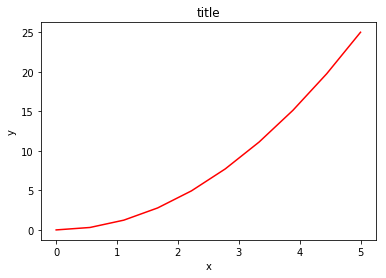

In [22]:
plt.figure()
plt.plot(x, y, 'r')
plt.xlabel('x')
plt.ylabel('y')
plt.title('title')

**Object-oriented:**

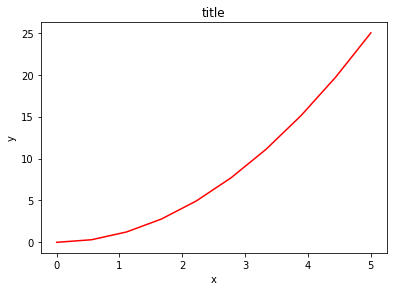

In [23]:
fig = plt.figure()

axes = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # left, bottom, width, height (range 0 to 1)

axes.plot(x, y, 'r')

axes.set_xlabel('x')
axes.set_ylabel('y')
axes.set_title('title');

In [36]:
# python way of random number generation
import random
x = [random.uniform(0,10) for i in range(100)]
x[:10]

[1.0073865599205212,
 9.237828268328549,
 7.848981051489807,
 5.30764056102485,
 4.447633538913093,
 1.7208578532287777,
 8.236510306771693,
 7.940458438538645,
 3.5685076999526255,
 8.289509124498242]

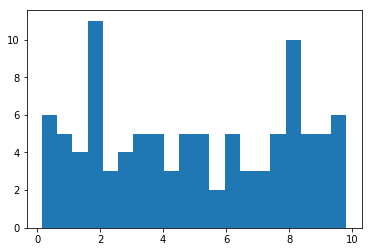

In [38]:
plt.hist(x, bins=20);

(array([   1.,    3.,   10.,   14.,   31.,   35.,   59.,   96.,  102.,
         112.,  117.,  112.,  102.,   80.,   50.,   32.,   29.,    8.,
           3.,    4.]),
 array([  6.7043348 ,   7.02452912,   7.34472345,   7.66491777,
          7.98511209,   8.30530641,   8.62550074,   8.94569506,
          9.26588938,   9.58608371,   9.90627803,  10.22647235,
         10.54666667,  10.866861  ,  11.18705532,  11.50724964,
         11.82744396,  12.14763829,  12.46783261,  12.78802693,  13.10822126]),
 <a list of 20 Patch objects>)

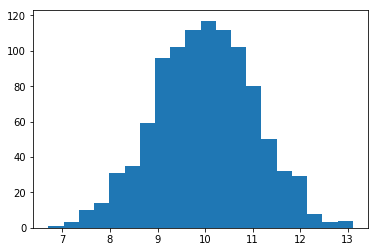

In [39]:
# numpy style
x = np.random.normal(0, size=1000) 
plt.hist(x, bins=20)

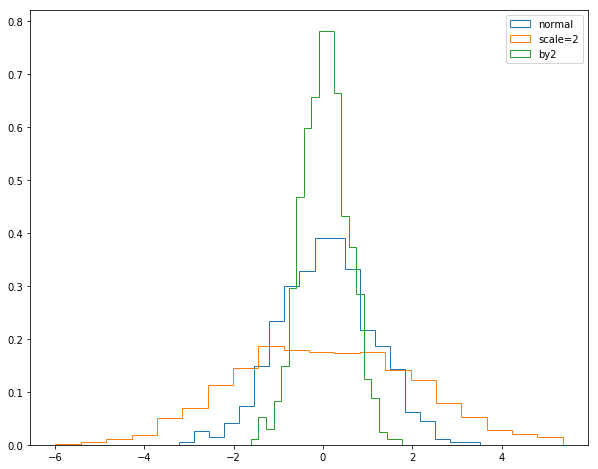

In [52]:
x = np.random.normal(0, scale=1, size=1000) 
x2 = np.random.normal(0, scale=2, size=1000)
x2by2 = x / 2
plt.figure(figsize=(10,8))
plt.hist(x, bins=20, histtype='step', density=True, label='normal')
plt.hist(x2, bins=20, histtype='step', density=True, label='scale=2')
plt.hist(x2by2, bins=20, histtype='step', density=True, label='by2');
plt.legend();

## Exercise 1

plot similar histograms of 1000 samples from numpy.random.gamma distributions